# EarlyHeart: Predictive Modeling for Early Heart Disease Detection

![HeartDisease](images/Heart-disease-know-your-risk.jpg)


## BUSINESS UNDERSTANDING

## Project Overview

The "Heart Disease Prediction" project aims to develop a predictive model that can assist healthcare professionals in assessing the risk of heart disease in patients. Heart disease remains a leading cause of mortality worldwide, and early diagnosis and intervention are crucial for improving patient outcomes. This project leverages data-driven approaches to aid medical practitioners in making informed decisions.

## Problem Statement

Heart disease is a complex condition influenced by various factors, including demographic, clinical, and lifestyle-related features. The goal of this project is to build a robust predictive model that can:
- Accurately predict the likelihood of heart disease based on patient data.
- Provide actionable insights to medical professionals for early diagnosis and timely intervention.

## Target Audience

The primary stakeholders and target audience for this project include:
- Cardiologists and medical practitioners: They can use the predictive model to assess patients' heart disease risk, allowing for proactive measures and personalized treatment plans.
- Patients: Individuals can benefit from risk assessments, encouraging health-conscious decisions and early consultation with healthcare providers.

## Value Proposition

The "Heart Disease Prediction" project offers several key value propositions:

1. **Early Detection**: The model enables early detection of heart disease, which is crucial for timely intervention and better patient outcomes.

2. **Personalized Healthcare**: Medical professionals can tailor treatment plans based on individual risk assessments, ensuring more effective and patient-centric care.

3. **Resource Optimization**: Healthcare facilities can allocate resources more efficiently by focusing on high-risk patients, reducing unnecessary tests and costs.

4. **Patient Empowerment**: Patients gain insights into their own health and can make informed decisions to mitigate risk factors.

5. **Reduced Mortality**: The project's success can contribute to reduced heart disease-related mortality by promoting early diagnosis and appropriate interventions.

## Project Goals

The overarching goals of the "Heart Disease Prediction" project are as follows:

1. Develop a robust predictive model for heart disease that achieves high accuracy and reliability.
2. Deploy the model as an API endpoint, allowing for real-time predictions.
3. Facilitate collaboration between data scientists and healthcare professionals to maximize the model's clinical utility.
4. Promote early diagnosis, patient engagement, and personalized treatment strategies to improve patient outcomes and reduce the burden of heart disease.

## Project Success Criteria

The project's success will be assessed based on the following criteria:

1. Model Performance: The model should achieve a high level of accuracy and AUC score when predicting heart disease risk.
2. Clinical Utility: The model should be easy to integrate into clinical practice and provide actionable insights.
3. Adoption Rate: The successful adoption of the predictive model by healthcare professionals and patients.
4. Reduction in Mortality: A reduction in heart disease-related mortality through early diagnosis and interventions.

This "Heart Disease Prediction" project aligns with the overarching goal of improving healthcare outcomes and addressing a critical global health concern.


## DATA UNDERSTANDING 

In [1]:
import pandas as pd

path="data/heart.csv"
df=pd.read_csv(path)
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [2]:
df.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dataset appears to contain information related to individuals and their risk of heart disease. Here's a brief summary of the columns:

1. Age: The age of the individuals.
2. Sex: Gender of the individuals (M for male, F for female).
3. ChestPainType: The type of chest pain experienced (e.g., ATA, NAP, ASY).
4. RestingBP: Resting blood pressure of the individuals.
5. Cholesterol: Cholesterol levels of the individuals.
6. FastingBS: Fasting blood sugar (0 for normal, 1 for elevated).
7. RestingECG: Resting electrocardiographic results (e.g., Normal, ST).
8. MaxHR: Maximum heart rate achieved.
9. ExerciseAngina: Presence of exercise-induced angina (Y for Yes, N for No).
10. Oldpeak: ST depression induced by exercise relative to rest.
11. ST_Slope: The slope of the ST segment (e.g., Up, Flat).
12. HeartDisease: The target variable indicating the presence of heart disease (0 for no, 1 for yes).

This dataset seems to be related to predicting the presence of heart disease based on various features.

In [4]:
for col in df.select_dtypes("object").columns:
    print(df[col].value_counts())
    print("\n")

M    725
F    193
Name: Sex, dtype: int64


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


N    547
Y    371
Name: ExerciseAngina, dtype: int64


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64




These counts give an overview of the distribution of categories in each of these columns within the dataset.

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No null values whatsoever

In [6]:
df.duplicated().sum()

0

No duplicated rows whatsoever

In [7]:
df.shape

(918, 12)

Dataset has 918 observations and 12 columns

In [8]:
column_value_counts = {}

for column in df.columns:
    column_value_counts[column] = df[column].value_counts()
        
for column, values in column_value_counts.items():
    print(f"Value Counts for Column '{column}':\n{values}\n")

Value Counts for Column 'Age':
54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64

Value Counts for Column 'Sex':
M    725
F    193
Name: Sex, dtype: int64

Value Counts for Column 'ChestPainType':
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Value Counts for Column 'RestingBP':
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64

Value Counts for Column 'Cholesterol':
0      172
254     11
223     10
220     10
230      9
     


- **Age:** The age distribution is quite varied, with the most common ages being 54, 58, and 55. There's a wide range of ages, from 28 to 76.

- **Sex:** The majority of the individuals in the dataset are male (725), with fewer females (193).

- **ChestPainType:** The most common chest pain type is "ASY" (496), followed by "NAP" (203), "ATA" (173), and "TA" (46).

- **RestingBP:** Resting blood pressure varies, with values ranging from 0 to 200. The most common values are around 120 and 130.

- **Cholesterol:** Cholesterol levels vary widely, with a maximum of 603 and a minimum of 0. The most common value is 0 (which might indicate missing or unusual data), followed by values around 220 to 230.

- **FastingBS:** The majority of individuals have a fasting blood sugar level of 0 (indicating fasting blood sugar < 120 mg/dl) (704), while others have a fasting blood sugar level of 1 (indicating fasting blood sugar > 120 mg/dl) (214).

- **RestingECG:** The most common resting ECG type is "Normal" (552), followed by "LVH" (188) and "ST" (178).

- **MaxHR:** The maximum heart rate varies, with values ranging from 60 to 202. The most common values are around 150 and 140.

- **ExerciseAngina:** The majority of individuals do not experience exercise-induced angina (547), while some do (371).

- **Oldpeak:** The Oldpeak values show variability, with common values being 0.0, 1.0, 2.0, and 1.5.

- **ST_Slope:** The most common ST segment slope is "Flat" (460), followed by "Up" (395), and "Down" (63).

- **HeartDisease:** The dataset is slightly imbalanced, with 508 individuals having heart disease (1) and 410 individuals not having heart disease (0).

In [9]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

some important observations based on the summary statistics and value counts for the dataset:

1. **Age Distribution**: The age of the individuals in the dataset ranges from 28 to 77, with a mean age of approximately 53.51. The distribution of ages is relatively even, with a peak around the ages of 54 and 58. This suggests that the dataset includes a wide age range of individuals.

2. **Blood Pressure and Cholesterol**: There are some unusual values in the "Resting Blood Pressure" and "Cholesterol" columns, with minimum values of 0. These values could be indicative of missing or incorrect data and should be carefully examined and potentially cleaned.

3. **Fasting Blood Sugar**: The dataset contains information about fasting blood sugar levels, with most individuals having a fasting blood sugar level of 0 (likely indicating fasting blood sugar < 120 mg/dl). This column is binary, with values 0 and 1.

4. **Max Heart Rate**: The maximum heart rate (MaxHR) of individuals in the dataset ranges from 60 to 202, with an average of approximately 136.81 beats per minute. MaxHR is an important factor in heart disease prediction, and the distribution varies, indicating individual differences in heart rate.

5. **Oldpeak**: The "Oldpeak" column represents the ST depression induced by exercise relative to rest. It ranges from -2.6 to 6.2, with an average of approximately 0.89. ST depression can be an important indicator of heart disease risk.

6. **Heart Disease Distribution**: The dataset contains a binary classification target variable for heart disease. About 55.34% of the individuals in the dataset are classified as having heart disease (target value 1), while 44.66% do not have heart disease (target value 0).

7. **Categorical Variables**: The dataset likely includes categorical variables such as "Sex," "ChestPainType," "RestingECG," "ExerciseAngina," and "ST_Slope." These categorical variables should be investigated further to understand their distribution and impact on heart disease prediction.

8. **Class Imbalance**: There is a class imbalance in the target variable "Heart Disease." It's important to be aware of this imbalance when building and evaluating predictive models.

9. **Data Quality**: The presence of unusual or missing values in the "Resting Blood Pressure" and "Cholesterol" columns suggests that data quality and preprocessing steps will be important when using this dataset for predictive modeling.

In [10]:
df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

In [11]:
data_types = df.dtypes

# Separate columns by data type
int_columns = data_types[data_types == 'int64'].index
float_columns = data_types[data_types == 'float64'].index
object_columns = data_types[data_types == 'object'].index

print("Unique Values Counts by Data Type:")

# Print columns and their counts for each data type
print("Integer Columns:")
print(df[int_columns].nunique())

print("\nFloat Columns:")
print(df[float_columns].nunique())

print("\nObject Columns:")
print(df[object_columns].nunique())

Unique Values Counts by Data Type:
Integer Columns:
Age              50
RestingBP        67
Cholesterol     222
FastingBS         2
MaxHR           119
HeartDisease      2
dtype: int64

Float Columns:
Oldpeak    53
dtype: int64

Object Columns:
Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64


Provides an overview of the diversity and cardinality of values within each data type which seems good.

## EDA: Exploratory Data Analysis

### Distribution of Categorical Variables

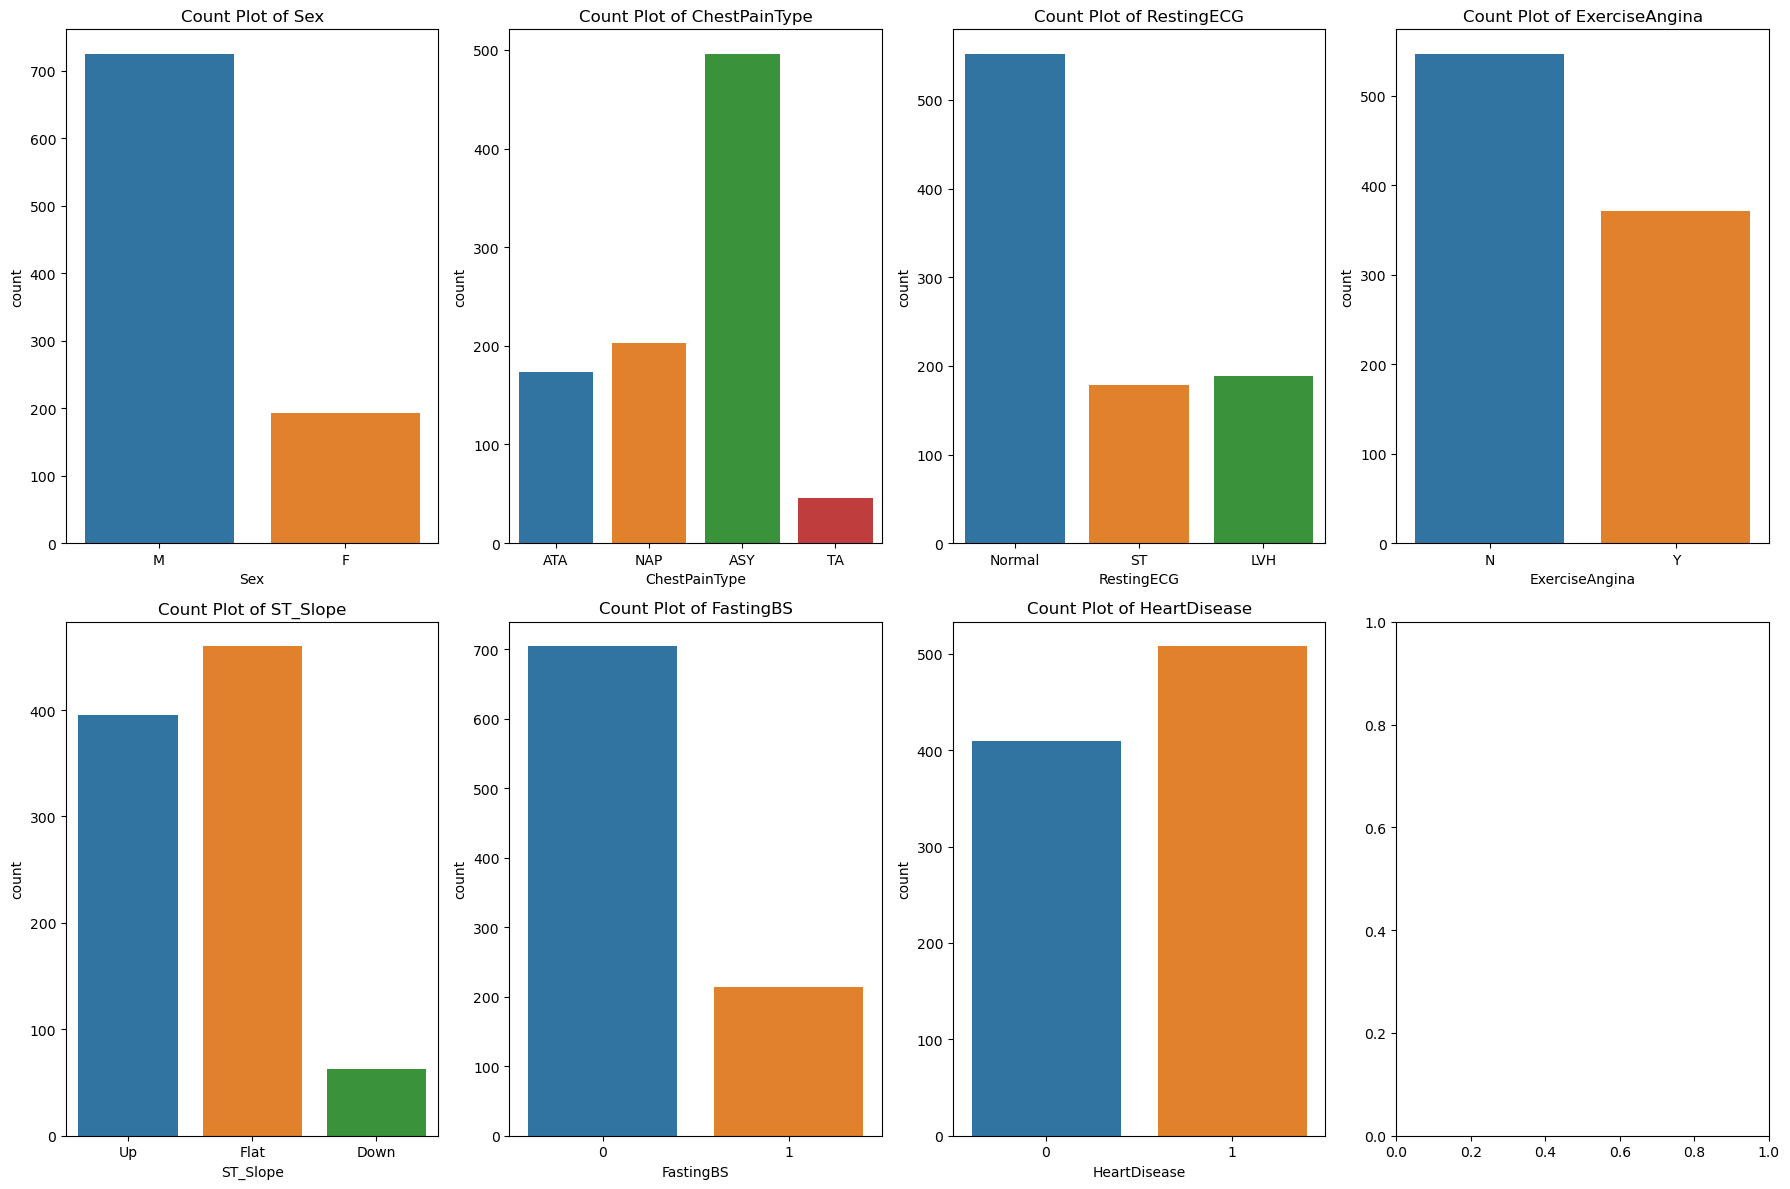

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical columns
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]

# Set up subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 12))

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


### Distribution of Continuous Variables

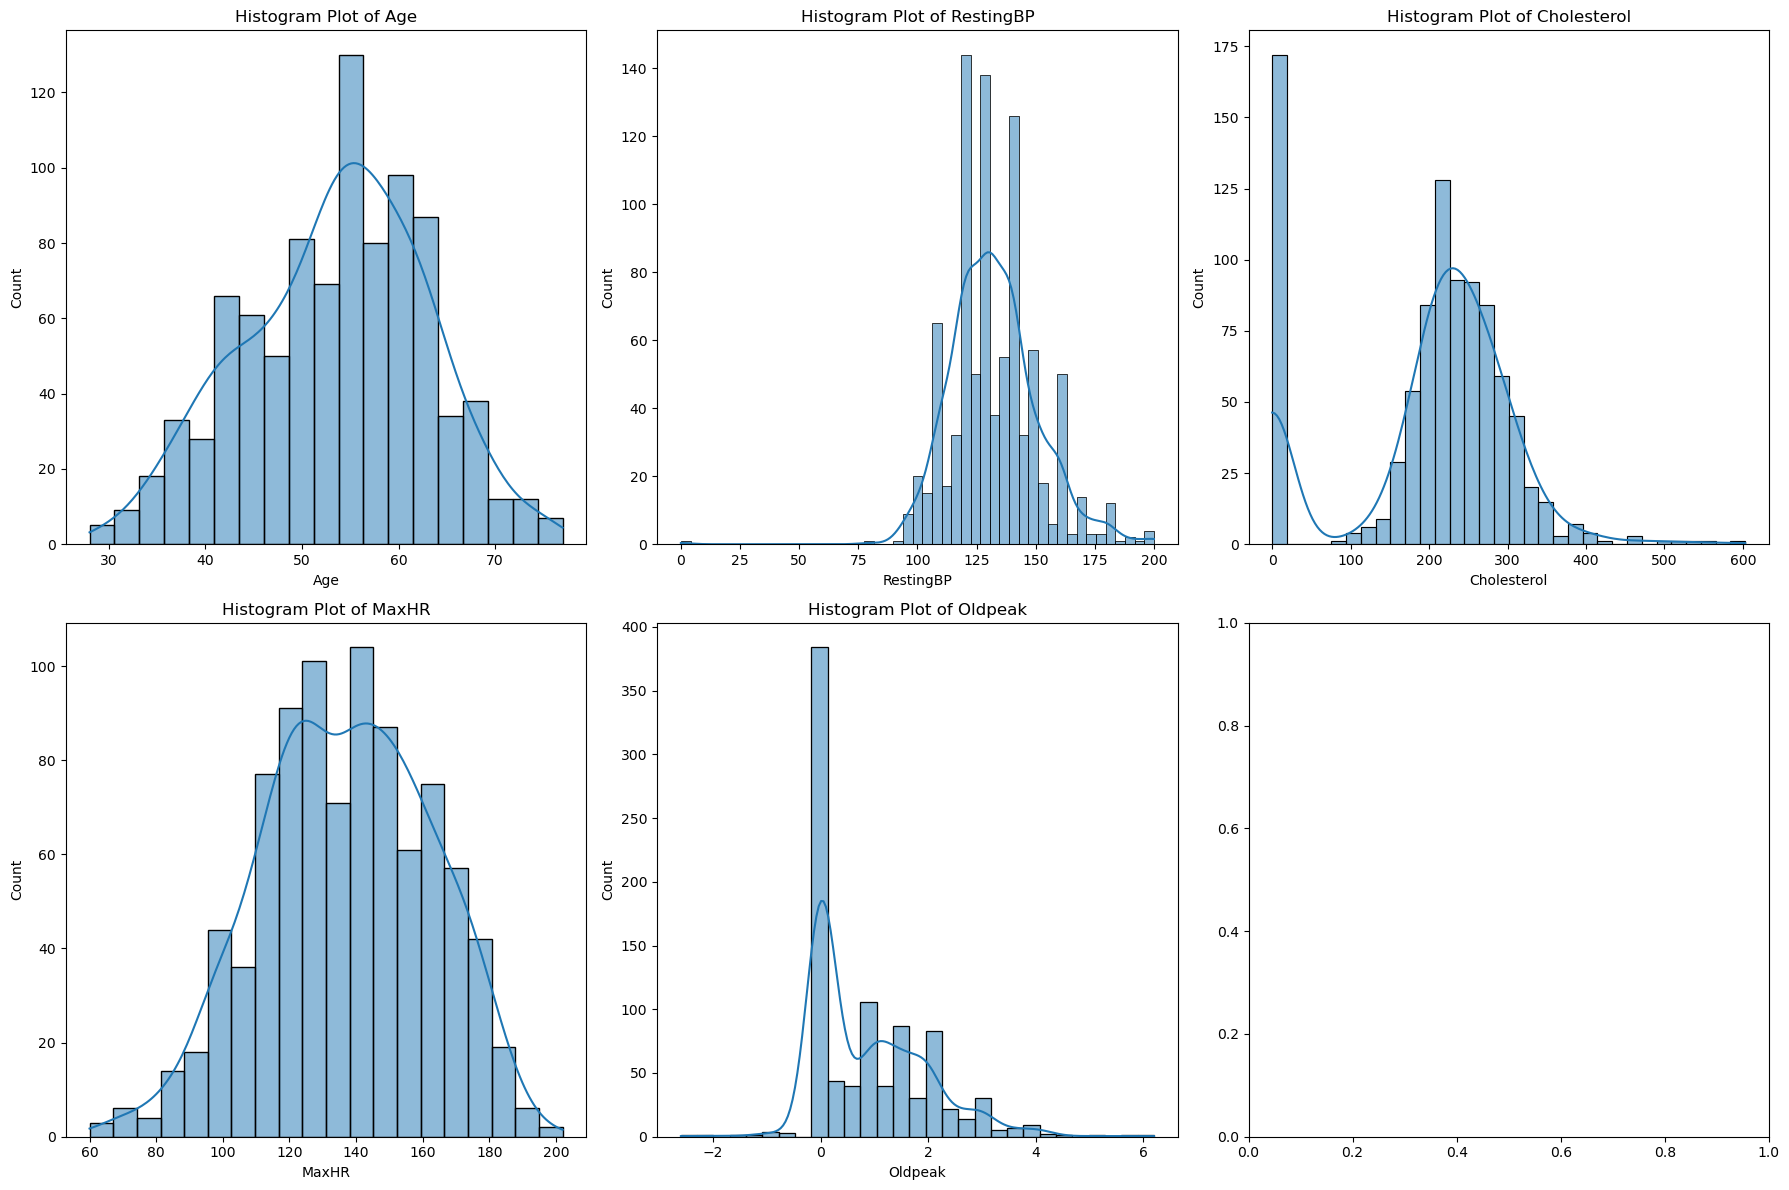

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loop through numerical columns and plot histogram plots
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Histogram Plot of {col}")

plt.tight_layout()
plt.show()


### Stacked Bar Graphs of Heart Disease by Categorical Variables

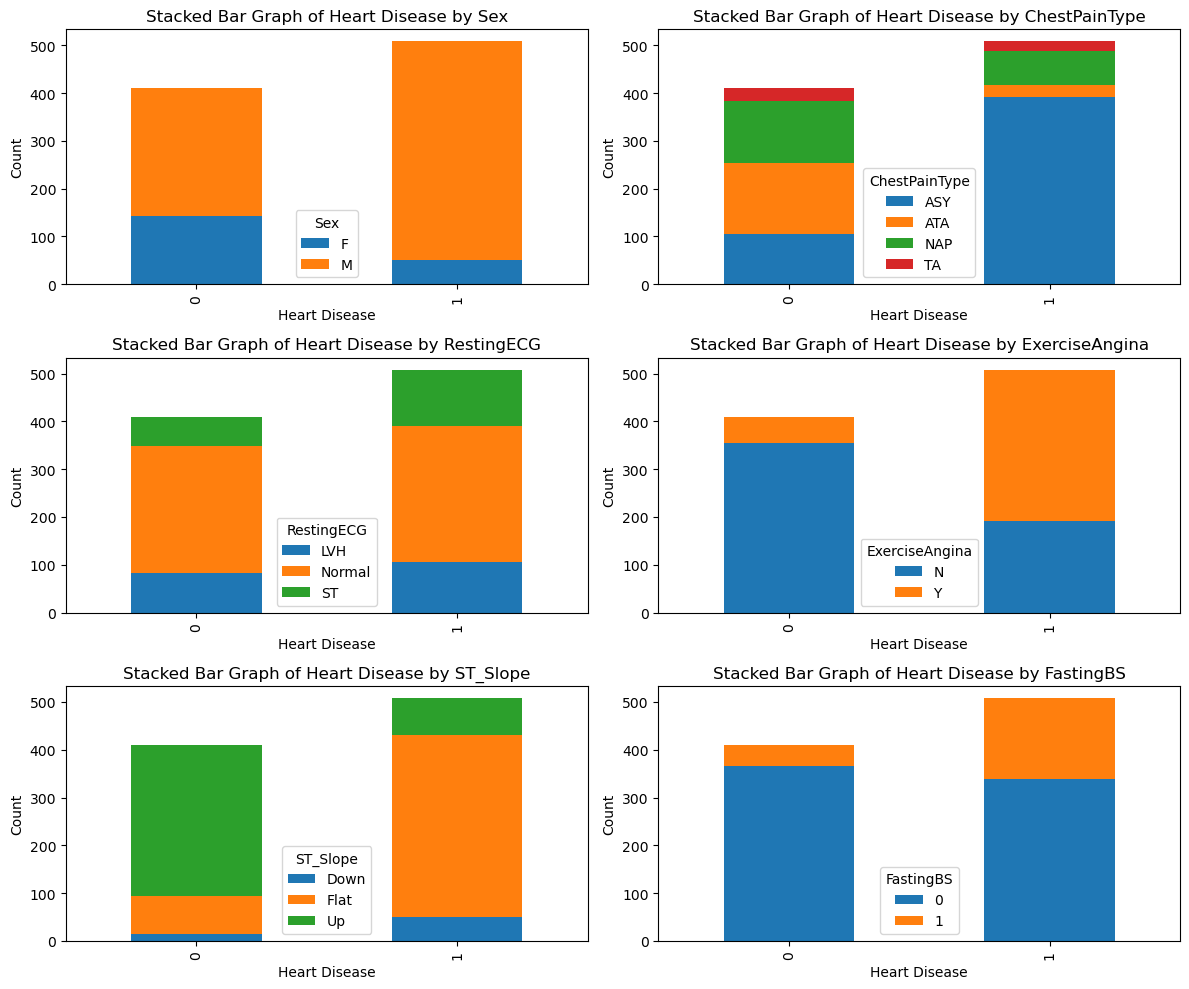

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS"]

# Define the number of columns for display
num_cols = 2

# Calculate the number of rows needed for subplots
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Loop through categorical columns and create stacked bar graphs
for i, col in enumerate(categorical_columns):
    row = i // num_cols
    col_num = i % num_cols
    cross_tab = pd.crosstab(df['HeartDisease'], df[col])
    ax = cross_tab.plot(kind='bar', stacked=True, ax=axes[row, col_num])
    ax.set_xlabel('Heart Disease')
    ax.set_ylabel('Count')
    ax.set_title(f'Stacked Bar Graph of Heart Disease by {col}')

# Adjust layout
plt.tight_layout()
plt.show()


### Correlation Heatmap of Numerical Features

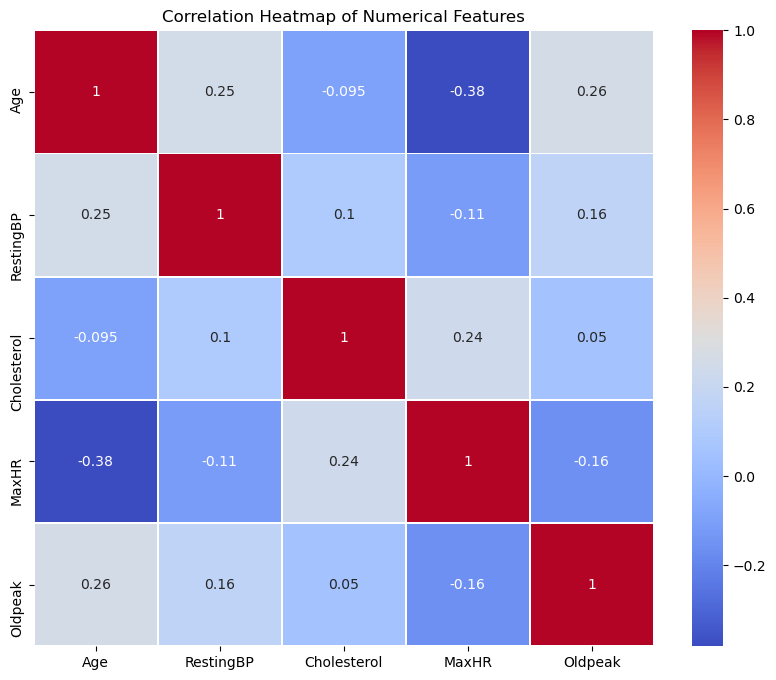

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


No observed multicollinearity

## MODELLING

In [16]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

### split the dataset into training, validation, and testing sets

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Split the dataset into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)


### applied feature extraction using the DictVectorizer to convert the data into a suitable format for machine learning.

In [18]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=False)

X_train = vectorizer.fit_transform(X_train.to_dict(orient='records'))
X_val = vectorizer.transform(X_val.to_dict(orient='records'))
X_test = vectorizer.transform(X_test.to_dict(orient='records'))

### Model 1: Train a logistic regression model and evaluate its performance.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define and initialize the logistic regression model
log_model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

# Fit the model to the training data
log_model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = log_model.predict(X_train)
y_val_pred = log_model.predict(X_val)

# Calculate accuracy for training and test data
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))


Training Accuracy: 0.87
Test Accuracy: 0.85


#### Receiver Operating Characteristic (ROC) Curve and AUC (Area Under the Curve)

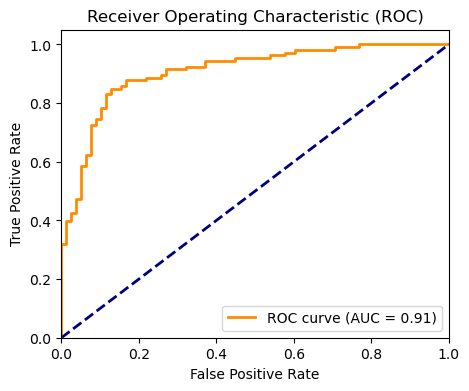

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_pred_proba = log_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Model 2: Hyperparameter tuning RandomForestClassifier model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# Initialize variables to store the best parameters and the highest AUC score
best_max_depth = 0
best_n_estimators = 0
best_auc = 0

# Define a range of values for max_depth and n_estimators to search
max_depth_values = [5, 10, 15, 20]
n_estimators_values = [10, 20, 30, 40]

# Iterate over max_depth and n_estimators combinations
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Create a RandomForestClassifier  model with the current parameters
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42, n_jobs=-1)
        
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the validation data
        y_pred_proba = model.predict_proba(X_val)[:, 1] 
        # Calculate the AUC score
        auc = roc_auc_score(y_val, y_pred_proba)
        
        # Check if the current AUC score is the best
        if auc > best_auc:
            best_auc = auc
            best_max_depth = max_depth
            best_n_estimators = n_estimators

# Print the best parameters and the highest AUC score
print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Highest AUC score: {best_auc}")


Best max_depth: 5
Best n_estimators: 30
Highest AUC score: 0.902636671504596


### Train tuned RandomForestClassifier model and evaluate its performance.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Create a Random Forest model with the best parameters
rf_model = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# Calculate accuracy for training and test data
acc_train = accuracy_score(y_train, y_train_pred)
acc_val = accuracy_score(y_val, y_val_pred)
print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

# Evaluate the best model on the test set
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]
test_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC score on test data: {test_auc:.2f}")


Training Accuracy: 0.91
Validation Accuracy: 0.86
AUC score on test data: 0.90


#### Receiver Operating Characteristic (ROC) Curve and AUC (Area Under the Curve)

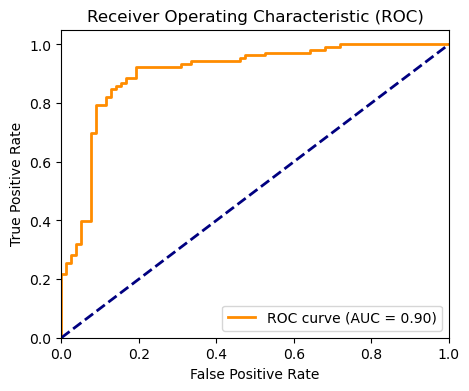

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model named 'model' and X_val and y_val are your test data
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Model 3: Hyperparameter tuning XG Boost model

In [24]:
import xgboost as xgb
from xgboost import DMatrix, train

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

best_params = None
best_auc = 0

for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        # Create a DMatrix for training data
        dtrain = DMatrix(X_train, label=y_train)
        # Create a DMatrix for testing data
        dtest = DMatrix(X_val, label=y_val)

        # Set hyperparameters
        params = {
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'nthread': 8,
            'seed': 42
        }

        # Train the XGBoost model
        model = train(params, dtrain, num_boost_round=100)         
        # Make predictions on the validation data
        y_pred_proba = model.predict(dtest)

        # Calculate the AUC score
        roc_auc = roc_auc_score(y_val, y_pred_proba)

        if roc_auc > best_auc:
            best_auc = roc_auc
            best_params = (max_depth, learning_rate)

print(f"Best hyperparameters: max_depth={best_params[0]}, learning_rate={best_params[1]}")
print(f"Highest AUC score: {best_auc:.2f}")


Best hyperparameters: max_depth=3, learning_rate=0.1
Highest AUC score: 0.90


### Train tuned XG Boost model and evaluate its performance.

In [25]:
# Create the best XGBoost model
xgb_model = xgb.XGBClassifier(
    max_depth=best_params[0],
    learning_rate=best_params[1],
    random_state=42
)

# Train the best model on the entire dataset
xgb_model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)

# Calculate accuracy for training and test data
acc_train = accuracy_score(y_train, y_train_pred)
acc_val = accuracy_score(y_val, y_val_pred)
print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

# Evaluate the best model on the test set
y_val_pred_proba = xgb_model.predict_proba(X_val)[:, 1]
test_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC score on test data: {test_auc:.2f}")


Training Accuracy: 0.96
Validation Accuracy: 0.84
AUC score on test data: 0.90


#### Receiver Operating Characteristic (ROC) Curve and AUC (Area Under the Curve)

AUC score on test data: 0.90


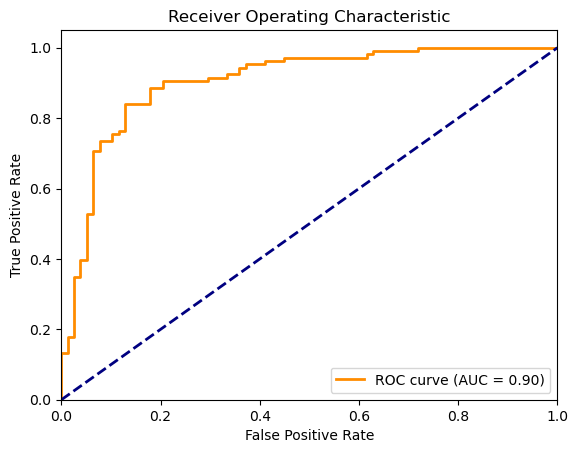

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Make predictions on the test data
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]

# Calculate the AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC score on test data: {roc_auc:.2f}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### Plot XG Boost

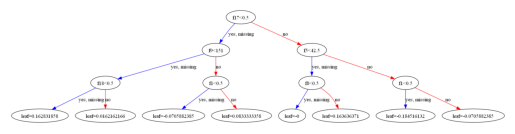

In [27]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# You can specify the tree index you want to plot, e.g., tree number 0
tree_index = 0

# Plot the specified tree
plot_tree(xgb_model, num_trees=tree_index)
plt.show()


## COMPARISON

#### Model Evaluation Metrics

In this section, model evaluation metrics for different machine learning models are presented. The table displays accuracy and AUC (Area Under the Curve) values for each model, which are key performance indicators in binary classification tasks.

In [28]:
from prettytable import PrettyTable

# Evaluate models
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Create a table
results_table = PrettyTable()
results_table.field_names = ["Model", "Accuracy", "AUC"]

# Populate the table with results
for model_name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    results_table.add_row([model_name, f"{accuracy:.2f}", f"{auc:.2f}"])

# Print the table
print(results_table)


+---------------------+----------+------+
|        Model        | Accuracy | AUC  |
+---------------------+----------+------+
| Logistic Regression |   0.85   | 0.91 |
|    Random Forest    |   0.86   | 0.90 |
|       XGBoost       |   0.84   | 0.90 |
+---------------------+----------+------+


Based on the accuracy and AUC scores, it appears that the Logistic Regression and Random Forest models are performing the best, with both having high accuracy and AUC scores. However, the AUC score of the XGBoost model is also high, indicating good performance.

## Model Saving

In [29]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    model_data = {
        'model': rf_model,
        'vectorizer': vectorizer
    }
    pickle.dump(model_data, file)


## Model Loading

In [30]:
import pickle

# Load the saved model and DictVectorizer from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model_data = pickle.load(file)

# Retrieve the loaded model and vectorizer
loaded_rf_model = loaded_model_data['model']
loaded_vectorizer = loaded_model_data['vectorizer']


## Predicting Heart Disease

In [31]:
# Create a sample patient data dictionary
sample_patient_data = {
    'Sex': 'Male',
    'ChestPainType': 'Typical Angina',
    'RestingBP': 130,
    'Cholesterol': 210,
    'FastingBS': 0,
    'RestingECG': 'ST-T wave abnormality',
    'MaxHR': 160,
    'ExerciseAngina': 'No',
    'Oldpeak': 1.2,
    'ST_Slope': 'Upsloping'
}

# Transform the dictionary into a feature vector using the loaded DictVectorizer
sample_patient_vector = loaded_vectorizer.transform([sample_patient_data])

print("Prob:", loaded_rf_model.predict_proba(sample_patient_vector)[0, 1])

# Make predictions using the loaded Random Forest model
predictions = loaded_rf_model.predict(sample_patient_vector)

# Print the predicted outcome for the sample patient
if predictions[0] == 0:
    print("The patient does not have heart disease.")
else:
    print("The patient has heart disease.")


Prob: 0.32267639058994724
The patient does not have heart disease.


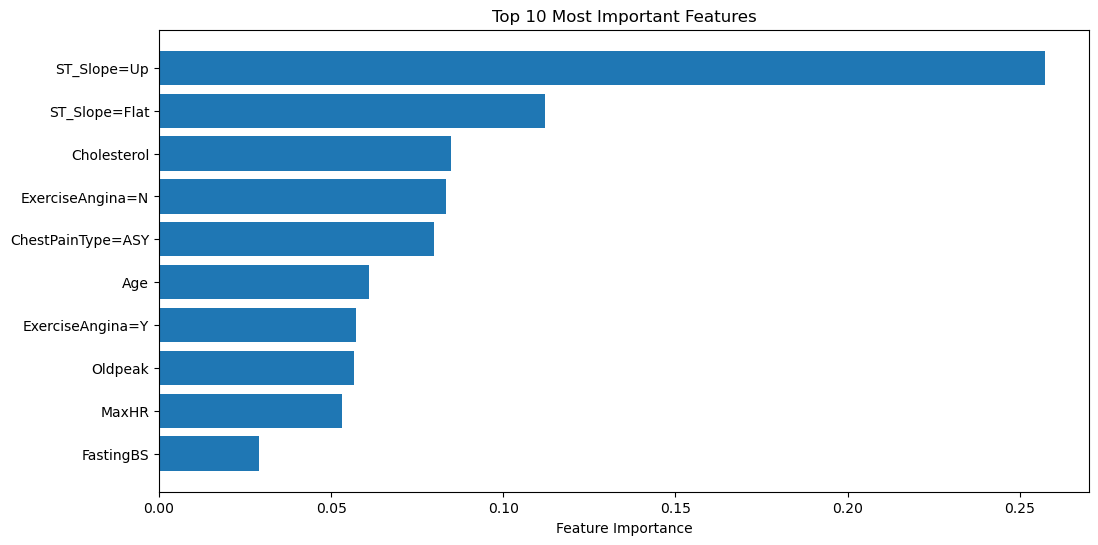

Feature  Importance
17        ST_Slope=Up    0.257227
16      ST_Slope=Flat    0.112082
5         Cholesterol    0.084709
6    ExerciseAngina=N    0.083369
1   ChestPainType=ASY    0.079962
0                 Age    0.061018
7    ExerciseAngina=Y    0.057245
10            Oldpeak    0.056769
9               MaxHR    0.053292
8           FastingBS    0.028958
11          RestingBP    0.024766
19              Sex=M    0.021836
18              Sex=F    0.021040
2   ChestPainType=ATA    0.019041
3   ChestPainType=NAP    0.016709
12     RestingECG=LVH    0.007322
14      RestingECG=ST    0.005110
13  RestingECG=Normal    0.003731
4    ChestPainType=TA    0.002923
15      ST_Slope=Down    0.002893

In [32]:
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = loaded_rf_model.feature_importances_

# Get the feature names from the DictVectorizer
feature_names = loaded_vectorizer.get_feature_names_out()

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
N = 10  # You can change N to display more or fewer features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:N], feature_importance_df['Importance'][:N])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()


feature_importance_df

 summary of the feature importances from your Random Forest model:

1. The most important feature is `ST_Slope=Up` with an importance score of approximately 0.257.
2. The second most important feature is `ST_Slope=Flat` with an importance score of about 0.112.
3. `Cholesterol`, `ExerciseAngina=N`, and `ChestPainType=ASY` are also significant features with importance scores of approximately 0.085, 0.083, and 0.080, respectively.
4. Other important features include `Age`, `ExerciseAngina=Y`, `Oldpeak`, `MaxHR`, and `FastingBS`.

The least important features include `ST_Slope=Down`, `ChestPainType=TA`, `RestingECG=Normal`, `RestingECG=ST`, and `RestingECG=LVH` with very low importance scores.

These feature importances provide insights into which features contribute the most to the predictions made by your model.

## CONCLUSION

In this project, we have developed a predictive model to assess the risk of heart disease in patients based on various clinical and demographic features. The project involved several key steps, including data exploration, preprocessing, model building, and evaluation.

## Data Analysis

We began by exploring the dataset, which contained information on patients' age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved during exercise, exercise-induced angina, ST depression induced by exercise relative to rest (Oldpeak), and the slope of the peak exercise ST segment (ST_Slope). We also had a target variable, 'HeartDisease,' which indicated the presence or absence of heart disease.

Key observations from the data analysis include:
- The dataset contains both numerical and categorical features.
- The dataset has 918 samples with a balanced distribution of positive and negative heart disease cases.

## Model Building and Evaluation

We built a predictive model using a Random Forest classifier to predict the likelihood of heart disease in patients. The model achieved promising results in terms of accuracy and AUC score on the validation set.

Key highlights of the model-building process:
- The model was trained and validated using a combination of numerical and categorical features.
- Feature importance analysis revealed the most critical predictors of heart disease, with 'ST_Slope=Up' being the most influential feature.
- We also evaluated the model using the Receiver Operating Characteristic (ROC) curve and calculated the Area Under the Curve (AUC) to assess its performance.

## Deployment

We deployed the trained Random Forest model as a predictive API endpoint using Flask. This API can accept patient data as input and provide predictions regarding the presence of heart disease. The deployment allows for real-time prediction of heart disease risk for new patients.

## Future Improvements

In future iterations of this project, the following enhancements can be considered:
- Collecting additional data to increase the size and diversity of the dataset, potentially improving model performance.
- Fine-tuning the model parameters to achieve even better predictive accuracy.
- Implementing additional features, such as handling missing data and dealing with class imbalances, to further enhance model robustness.

Overall, this project provides a valuable tool for assessing the risk of heart disease in patients, which can be used in a clinical setting for early diagnosis and intervention.


Follow me on Twitter üê¶, connect with me on LinkedIn üîó, and check out my GitHub üêô. You won't be disappointed!

üëâ Twitter: https://twitter.com/NdiranguMuturi1  
üëâ LinkedIn: https://www.linkedin.com/in/isaac-muturi-3b6b2b237  
üëâ GitHub: https://github.com/Isaac-Ndirangu-Muturi-749  